In [1]:
from matplotlib import pyplot
import pandas as pd
import warnings
import copy

from summer.utils import ref_times_to_dti

from autumn.tools.project import get_project, load_timeseries, build_rel_path
from autumn.settings.constants import COVID_BASE_DATETIME
from autumn.tools.utils.pretty import pretty_print

In [2]:
pyplot.style.use("ggplot")
warnings.filterwarnings("ignore")
region = "bangladesh"

In [3]:
# Be careful of this
from autumn.projects.sm_sir.bangladesh.bangladesh import project

In [4]:
def convert_ts_index_to_date(ts):
    ts.index = ref_times_to_dti(COVID_BASE_DATETIME, ts.index)
    return ts

In [5]:
ts_sets = project.ts_set
ts_set_dates = {k: convert_ts_index_to_date(v) for k, v in ts_sets.items()}

In [6]:
project = get_project("sm_sir", region, reload=True)
baseline_params = project.param_set.baseline
model = project.run_baseline_model(baseline_params)
derived_df = model.get_derived_outputs_df()
model_start_time = ref_times_to_dti(COVID_BASE_DATETIME, [baseline_params["time"]["start"]])[0]

In [7]:
sc_models = project.run_scenario_models(model, project.param_set.scenarios)
derived_dfs = [m.get_derived_outputs_df() for m in sc_models]

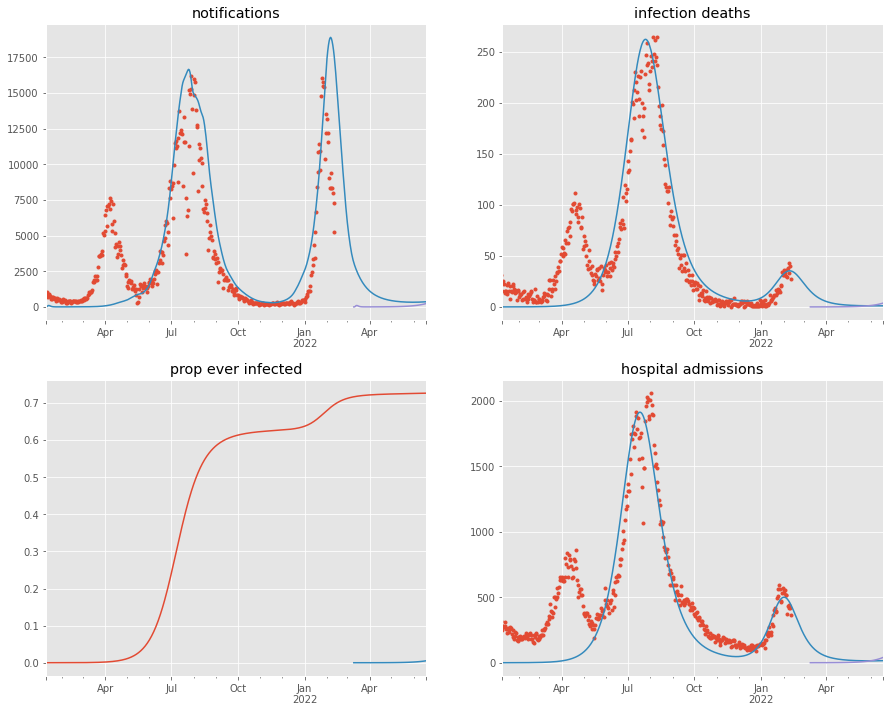

In [8]:
outputs_to_plot = ["notifications", "infection_deaths", "prop_ever_infected", "hospital_admissions"]
plot_end_time = ref_times_to_dti(COVID_BASE_DATETIME, [1000.])[0]

fig = pyplot.figure(figsize=(15, 12))
for i_out, output in enumerate(outputs_to_plot):
    axis = fig.add_subplot(2, 2, i_out + 1)
    if output in ts_set_dates:
        ts_set_dates[output].plot(ax=axis, style='.')
    if output in derived_df:
        derived_df[output].plot(ax=axis)
    axis.set_title(output.replace("_", " "))
    axis.set_xlim(left=model_start_time)
    for scenario in [0]:
        results_df = derived_dfs[scenario][outputs_to_plot[i_out]]
        indices = results_df.index
        axis.plot(indices, results_df)